## Comb & All Pass Filters
#### Annie Chu | October 2022

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal

### METHOD 1: USING SCIPY'S FILTER FUNCTION

In [ ]:
#FEEDFORWARD COMB FILTER: TF = [1 + a*z^-k]

In [ ]:
f0 = 30.0  # Frequency to be removed from signal (Hz)
fs = f0*10  # sampling freq
Q = 30.0  # Quality factor

# Design notching comb filter
num, den = signal.iircomb(f0, Q, ftype='notch', fs=fs)
#print(num, den)

In [ ]:
sys = signal.TransferFunction(num, den) #initializing transfer function: not necessary
#print(sys) 

In [ ]:
#plot step response of transfer function
time, response = signal.step(sys)
plt.plot(time,response,label="Impulse of FF Comb")
plt.show()

In [ ]:
#creating freq & magnitude vector for plotting
freq, resp = signal.freqz(num, den, fs=fs)
response = abs(resp)
# To avoid divide by zero when graphing
response[response == 0] = 1e-20
# Plot
plt.plot(freq, response)
plt.show()

# angles = np.unwrap(np.angle(h))
# plt.plot(w/max(w), angles, 'g')
# plt.ylabel('phase (radians)', color='g')
# plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
# plt.show()

In [ ]:
#FEEDBACK COMB FILTER: z^{-\tau}/1-gz^{-\tau}

In [ ]:
num_fb, den_fb = signal.iircomb(f0, Q, ftype='peak', fs=fs)
freq, resp = signal.freqz(num_fb, den_fb, fs=fs)
response = abs(resp)
# To avoid divide by zero when graphing
response[response == 0] = 1e-20
# Plot
plt.plot(freq, response)
plt.show()

# angles = np.unwrap(np.angle(response))
# plt.plot(freq/max(freq), angles, 'g')
# plt.ylabel('phase (radians)', color='g')
# plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
# plt.show()

In [ ]:
print(num_fb)

In [ ]:
print(den_fb)

### METHOD 2: TRANSFER FUNCTIONS

https://en.wikipedia.org/wiki/Comb_filter
Confused how to input f0

In [ ]:
# FEEDBACK H(F) METHOD: z^{-\tau}/1-gz^{-\tau}
fs = 300
g = 0.9;

def fb_comb_tf(k, g ): # k= delay
    den = np.zeros(k+1)
    num = np.zeros(k+1)
    den[0] = 1
    num[len(num)-1] = 1
    den[len(den)-1] = g;
    #print(num, den)
    return num, den

#B = [0, 0, 0, 0, 0, 0, 1]; 
#A = [1, 0, 0, 0, 0, 0, g];

#magnitude and phase response
B, A = fb_comb_tf(6, 0.9);
w, h = signal.freqz(B,A, fs = fs);

h = abs(h);
h[h==0] = 1e-20
plt.plot(w, h)
plt.show()

# angles = np.unwrap(np.angle(h))
# plt.plot(w, angles, 'g')
# plt.ylabel('phase (radians)', color='g')
# plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
# plt.show()

In [ ]:
def ff_comb_tf(k, g): # k= delay
    den = np.zeros(k+1)
    num = np.zeros(k+1)
    num[0] = 1
    num[len(num)-1] = -g
    den[0] = 1
    #print(num, den)
    return num, den
fs = 100;
b, a = ff_comb_tf(5, 0.9)
w, h = signal.freqz(b,a, fs = fs); #looks like filtered out is 5 * f0 (desired filteres freq)
h = abs(h);
h[h==0] = 1e-20;
plt.plot(w, h)
plt.show()

# angles = np.unwrap(np.angle(h))
# plt.plot(w/max(w), angles, 'g')
# plt.ylabel('phase (radians)', color='g')
# plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
# plt.show()

In [ ]:
'''
SAME AS ABOVE, JUST WITHOUT FUNCTION
'''
# FEEDFORWARD H(F) METHOD: 1+ gz^{-\tau}
g = 0.9;
B = [1, 0, 0, 0, 0, -g]; 
A = [1, 0, 0, 0, 0, 0];
#magnitude and phase response
w, h = signal.freqz(B,A, fs = 100); #looks like filtered out is 5 * f0 (desired filteres freq)
h = abs(h);
h[h==0] = 1e-20;
plt.plot(w, h)
plt.show()

### ALL PASS FILTER
https://sevagh.github.io/warped-linear-prediction/First-order%20all-pass%20filter.html

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
#first order
#transfer function: [z^-1 - lambda]/[1-lambda*z^-1]
#where lambda = complex pole -- what does this mean
#assuming lambda = 0 in this model
lam = 0; 
num_ap = [lam, 1]
den_ap = [1, lam]

w, h = signal.freqz(num_ap, den_ap)

In [ ]:
plt.title('frequency response of unit delay')
plt.plot(w/max(w), 20 * np.log10(abs(h)), 'b')
plt.ylim(-1, 1)
plt.ylabel('amplitude (dB)', color='b')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
plt.show()

In [ ]:
angles = np.unwrap(np.angle(h))
plt.plot(w/max(w), angles, 'g')
plt.ylabel('phase (radians)', color='g')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')
plt.show()

In [30]:
# feedback comb filter

def comb(x_n, g, d):
    # x_n is numpy array of initial samples
    y_n = np.zeros(len(x_n));
    for i in range(len(x_n)):
        if i-d < 0:
            y_n[i] = x_n[i]
        else:
            y_n[i] = x_n[i] + g*y_n[i-d]
    return y_n

x1 = np.array([1.0, 0.1, -0.1])

y1 = comb(x1, 0.5, 1)
y2 = comb(x1, 0.5, 1)

print(y1)
print(y1+y2)

[1.  0.6 0.2]
[2.  1.2 0.4]


In [31]:
def allpass(x_n, g, d):
    # x_n is numpy array of initial samples
    y_n = np.zeros(len(x_n));
    for i in range(len(x_n)):
        if i-d < 0:
            y_n[i] = g*x_n[i]
        else:
            y_n[i] = g*x_n[i] + x_n[i-d] - g*y_n[i-d]
    return y_n

x1 = np.array([1.0, 0.1, -0.1])

allpass(x1, 0.5, 1)

array([ 0.5 ,  0.8 , -0.35])

In [32]:
x = np.array([1.0, 0.1, -0.1]) #input signal

def schroeder(x):
    yc1 = comb(x, 0.805, 901) 
    yc2 = comb(x, 0.827, 778)
    yc3 = comb(x, 0.783, 1011)
    yc4 = comb(x, 0.764, 1123)

    yc_out = yc1 + yc2 + yc3 + yc4
    yap1 = allpass(yc_out, 0.7, 125)
    yap2 = allpass(yap1, 0.7, 42)
    yap3 = allpass(yap2, 0.7, 12)
    y_final = yap3 + 0.7*x
    return y_final

print(x)
print(schroeder(x))





[ 1.   0.1 -0.1]
[ 2.072   0.2072 -0.2072]


In [33]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
#samplerate, data = wavfile.read('./output/audio.wav')

In [34]:
#testing with internal wav file
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"number of channels = {data.shape[1]}")

length = 0.01s
number of channels = 2


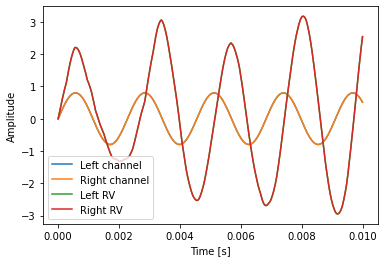

In [35]:
time = np.linspace(0., length, data.shape[0])
dleft = data[:, 0]
dright = data[:, 1]
rv_dleft = schroeder(dleft)
rv_dright = schroeder(dright)
plt.plot(time, dleft, label="Left channel")
plt.plot(time, dright, label="Right channel")
plt.plot(time, rv_dleft, label="Left RV")
plt.plot(time, rv_dright, label="Right RV")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [36]:
print(data)

[[ 0.          0.        ]
 [ 0.05011868  0.05011868]
 [ 0.10004044  0.10004044]
 [ 0.14956915  0.14956915]
 [ 0.19851029  0.19851029]
 [ 0.24667156  0.24667156]
 [ 0.29386377  0.29386377]
 [ 0.33990133  0.33990133]
 [ 0.38460374  0.38460374]
 [ 0.42779493  0.42779493]
 [ 0.46930563  0.46930563]
 [ 0.5089725   0.5089725 ]
 [ 0.5466399   0.5466399 ]
 [ 0.58215964  0.58215964]
 [ 0.6153922   0.6153922 ]
 [ 0.6462072   0.6462072 ]
 [ 0.6744834   0.6744834 ]
 [ 0.70010984  0.70010984]
 [ 0.72298574  0.72298574]
 [ 0.74302125  0.74302125]
 [ 0.7601378   0.7601378 ]
 [ 0.7742679   0.7742679 ]
 [ 0.78535604  0.78535604]
 [ 0.79335904  0.79335904]
 [ 0.79824495  0.79824495]
 [ 0.79999495  0.79999495]
 [ 0.798602    0.798602  ]
 [ 0.7940717   0.7940717 ]
 [ 0.78642166  0.78642166]
 [ 0.775682    0.775682  ]
 [ 0.76189494  0.76189494]
 [ 0.7451147   0.7451147 ]
 [ 0.7254071   0.7254071 ]
 [ 0.7028496   0.7028496 ]
 [ 0.677531    0.677531  ]
 [ 0.64955044  0.64955044]
 [ 0.6190181   0.6190181 ]
 

In [43]:
#testing with downloaded cantina band file
audiofile = "/Users/anniechu/Desktop/CantinaBand3.wav"
fs, cb_data = wavfile.read(audiofile)

In [44]:
print(cb_data)

[   3    7    0 ...  -12 -427 -227]


In [45]:
length = cb_data.shape[0] / fs
print(f"length = {length}s")


length = 3.0s


In [46]:
import simpleaudio as sa
wave_obj = sa.WaveObject.from_wave_file(audiofile)
play_obj = wave_obj.play()
#play_obj.wait_done()

In [18]:
play_obj.stop()

In [66]:
#add reverb
#rv_cb = cb_data + allpass(cb_data, 0.5, 2000)
rv_cb = schroeder(cb_data)

print(len(cb_data))
print(len(rv_cb))
rv_cb1=np.int16(rv_cb/np.max(np.abs(rv_cb)) * 32767)


66150
66150


In [70]:
play_obj = sa.play_buffer(cb_data, 1, 2, fs)

In [61]:
play_obj.stop()

In [71]:
play_obj = sa.play_buffer(rv_cb1, 1, 2, fs)

In [59]:
play_obj.stop()